In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

plt.style.use("seaborn-v0_8")

In [7]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

In [8]:
from config.db_config import CONN_STR

query = "SELECT * FROM customer_shopping_trends"

conn = pyodbc.connect(CONN_STR)
df = pd.read_sql(query, conn)
conn.close()

df.head()

C:\Users\nghoo\AppData\Local\Temp\ipykernel_14384\496161458.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## OVERVIEW DATA

In [9]:
df.shape

(3900, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3900 non-null   int64  
 1   age                       3900 non-null   int64  
 2   gender                    3900 non-null   object 
 3   item_purchased            3900 non-null   object 
 4   category                  3900 non-null   object 
 5   purchase_amount_usd       3900 non-null   int64  
 6   location                  3900 non-null   object 
 7   size                      3900 non-null   object 
 8   color                     3900 non-null   object 
 9   season                    3900 non-null   object 
 10  review_rating             3900 non-null   float64
 11  subscription_status       3900 non-null   object 
 12  payment_method            3900 non-null   object 
 13  shipping_type             3900 non-null   object 
 14  discount

In [11]:
df.describe()

,customer_id,age,purchase_amount_usd,review_rating,previous_purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## CHECK DATA QUALITY

In [12]:
df.isnull().sum()

customer_id                 0
age                         0
gender                      0
item_purchased              0
category                    0
purchase_amount_usd         0
location                    0
size                        0
color                       0
season                      0
review_rating               0
subscription_status         0
payment_method              0
shipping_type               0
discount_applied            0
promo_code_used             0
previous_purchases          0
preferred_payment_method    0
frequency_of_purchases      0
dtype: int64

In [13]:
df.duplicated(subset=["customer_id"]).sum()

np.int64(0)

## VISUALIZATION

### Phân bố độ tuổi khách hàng

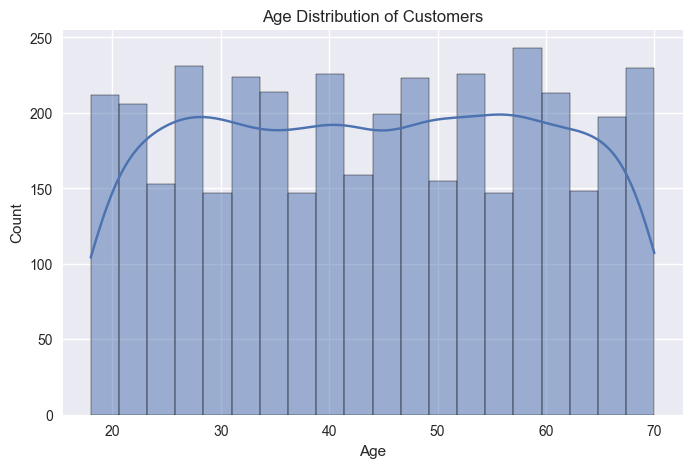

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Chi tiêu theo Category 

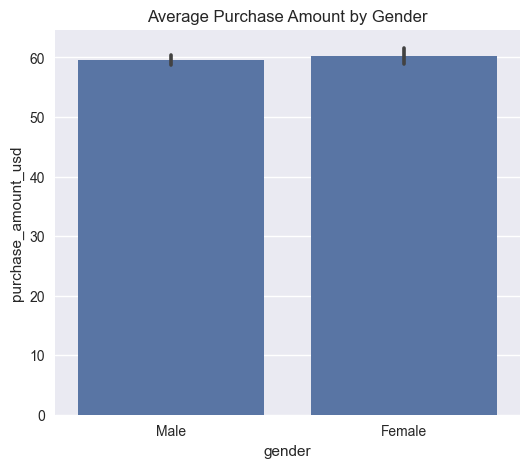

In [15]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=df,
    x="gender",
    y="purchase_amount_usd",
    estimator="mean"
)
plt.title("Average Purchase Amount by Gender")
plt.show()

### Phương thức thanh toán phổ biến

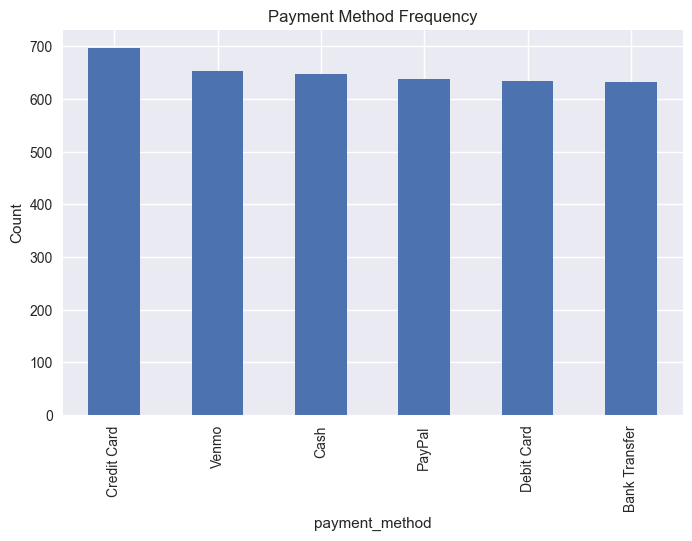

In [16]:
plt.figure(figsize=(8,5))
df["payment_method"].value_counts().plot(kind="bar")
plt.title("Payment Method Frequency")
plt.ylabel("Count")
plt.show()

### Subscription ảnh hưởng đến chi tiêu?

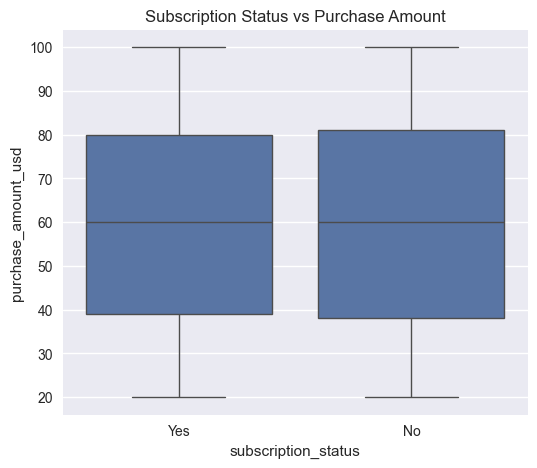

In [17]:
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x="subscription_status",
    y="purchase_amount_usd"
)
plt.title("Subscription Status vs Purchase Amount")
plt.show()

### Tần suất mua hàng

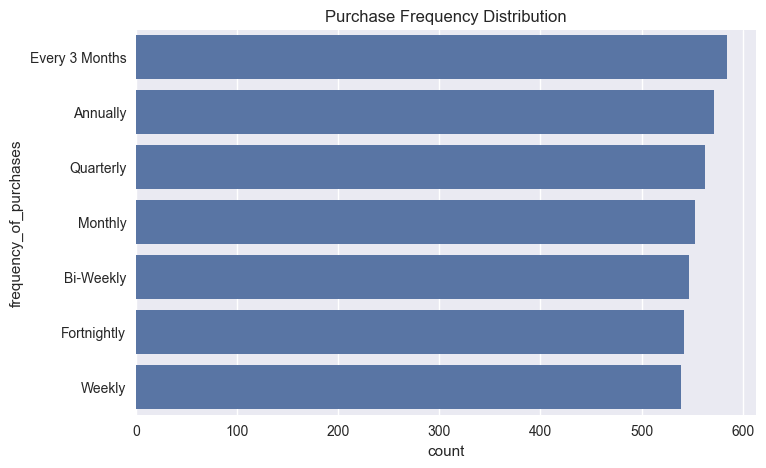

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    y="frequency_of_purchases",
    order=df["frequency_of_purchases"].value_counts().index
)
plt.title("Purchase Frequency Distribution")
plt.show()

## INSIGHTS

### Key Insights

- Most customers fall into the age range of 25–45.
- Clothing category has the highest variance in spending.
- Subscribers tend to spend more per purchase than non-subscribers.
- Credit Card and PayPal are the most common payment methods.
- Weekly buyers contribute significantly to total revenue.

### Conclusion

This EDA provides insights into customer demographics, purchasing behavior,
and payment preferences. The results can be used for:
- Marketing segmentation
- Subscription strategy optimization
- Product category prioritization